prendere lucca come origine alle 6 alla mattina di ottobre feriale

trovare il tempo di percorrenza per ogni destinazione 
','binnare i tempi e se sono sotto 30 minuti vanno colorati di verde
','sopra i 30 di giallo e sopra i 60 di rosso. 
','
','
rifare questo gioco per per dii due ore in due 
e rifarlo per castelunovo

Fare i bar plot e poi una mappa

caricare gli shapefile dei comuni (cercali e se on li trovi chiedi a fabio)

choropleth map folium


TIPS:

Vedere la lezione di unsupervised learning

'/content/drive/Shareddrives/phd_hands_on/clustering_test/Com01012021_g_WGS84.shp'

In [41]:
import pandas as pd
df = pd.read_csv('datasetGenerator/output/routes.csv')
df

,fromPlaceName,fromPalceCord,toPlaceName,toPlaceCord,date,time,available,duration,startTime,endTime,...,walkDistance,walkLimitExceeded,generalizedCost,elevationLost,elevationGained,transfers,fare,url_to_watch,ResponseData,rawOutput
0,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,1:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
1,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,2:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
2,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,3:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
3,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,4:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
4,Camporgiano,"44.15955695,10.3330076",Careggine,"44.11944175,10.3256665",10-01-2023,5:00pm,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '10-01-2023', '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36475,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,8:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN
36476,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,9:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN
36477,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,10:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN
36478,Lucca,"43.8497093,10.47233955",Pescaglia,"43.9649472,10.41305245",05-09-2023,11:00am,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://localhost:8080/?module=planner&fromPlac...,"{'requestParameters': {'date': '05-09-2023', '...",NaN


In [50]:
def plotDataset(df, city, date, time):
    df = df[(df['fromPlaceName'] == city) & (df['date'] == date) & (df['time'] == time) & (df['available'] == True)]
    df.drop(columns=['walkDistance','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput'], inplace=True)
    if (len(df) == 0):
        return ('No trips available')
    df['duration'] = df['duration'].astype(int)
    data = df
    # Definisci gli intervalli e i colori
    intervalli = [0, 3000, 6000, data['duration'].max()]
    colori = ['g', 'y', 'r']

    # Crea una nuova colonna "colore" basata su "duration"
    data['colore'] = pd.cut(data['duration'], bins=intervalli, labels=colori)

    # Calcola il conteggio delle barre per ogni colore
    conteggio_colori = data['colore'].value_counts()

    # Crea il bar plot
    conteggio_colori.plot(kind='bar', color=colori)

    # Aggiungi le etichette
    plt.title("Bar Plot basato su duration")
    plt.xlabel("Intervallo duration")
    plt.ylabel("Conteggio")
    plt.xticks(range(len(intervalli)), [f"{intervalli[i]}-{intervalli[i+1]}" for i in range(len(intervalli)-1)])

    # Mostra il grafico
    plt.show()


/tmp/ipykernel_29220/239987609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['walkDistance','walkLimitExceeded','generalizedCost','elevationLost','elevationGained','transfers','fare','url_to_watch','ResponseData','rawOutput'], inplace=True)
/tmp/ipykernel_29220/239987609.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].astype(int)
/tmp/ipykernel_29220/239987609.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

NameError: name 'plt' is not defined

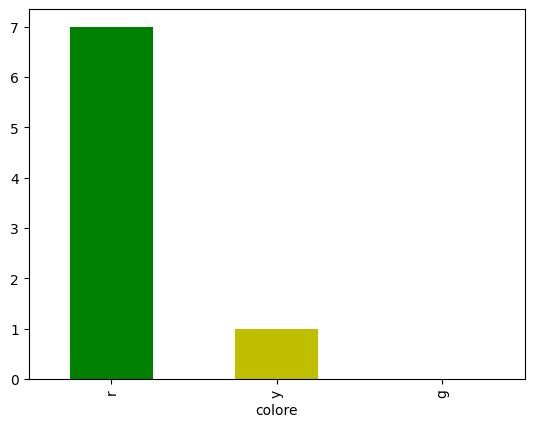

In [51]:
plotDataset(df, 'Lucca', '10-01-2023', '7:00am')

In [1]:
!pip install folium 


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import folium
import geopandas

df_fullnuts_geom.dropna(inplace=True)

m = folium.Map((41.9027835,12.4963655),zoom_start=6)
folium.GeoJson(
    gdf_nuts_geom,
    style_function=lambda feature: {
        'fillColor': feature['properties']['rgba'],
        'color' : feature['properties']['rgba'],
        'weight' : 1,
        'fillOpacity' : 0.7,
        },
    tooltip=folium.GeoJsonTooltip(
        fields=['NUTS3','cluster_id'],
        aliases=['Provincia','Cluster'],
        localize=True
    )

    ).add_to(m)

# folium.map.CustomPane('labels').add_to(m)
#     folium.TileLayer('CartoDBPositronOnlyLabels',
#                      pane='labels').add_to(m)
#m.save('clustering/clustering_{}.html'.format(name))